<a href="https://colab.research.google.com/github/anthonykupecz/Learnings/blob/main/Stock_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib_inline
from datetime import datetime

Intro to YFinance Library
Ticker object gets you essentially all you need for the stock
The .history() function gets the stock history

In [ ]:
# Can use Ticker module to create object that has data in it
apple = yf.Ticker("AAPL")

#Can access various things about it
aapl_stocks = apple.history(period="max")

# Getting additional info
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
apple_info

aapl_stocks.dtypes

--2024-07-31 14:38:33--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json.3’

apple.json.3        100%[===================>]   5.57K  --.-KB/s    in 0s      

2024-07-31 14:38:33 (827 MB/s) - ‘apple.json.3’ saved [5699/5699]



,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Dividends,float64
Stock Splits,float64


In [ ]:
aapl_stocks.reset_index(inplace=True)
aapl_stocks.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1,1,1980-12-15 00:00:00-05:00,0.094321,0.094321,0.093890,0.093890,175884800,0.0,0.0
2,2,1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
3,3,1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
4,4,1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


<Axes: xlabel='Date'>

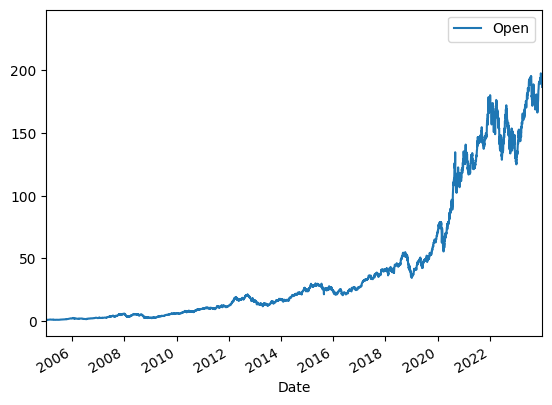

In [ ]:
# Plot open price against day
plt = aapl_stocks.plot(x="Date", y="Open")
plt.set_xlim(datetime.strptime('2005/01/01' , '%Y/%m/%d'), datetime.strptime('2024/01/01' , '%Y/%m/%d'))
plt

<Axes: xlabel='Date'>

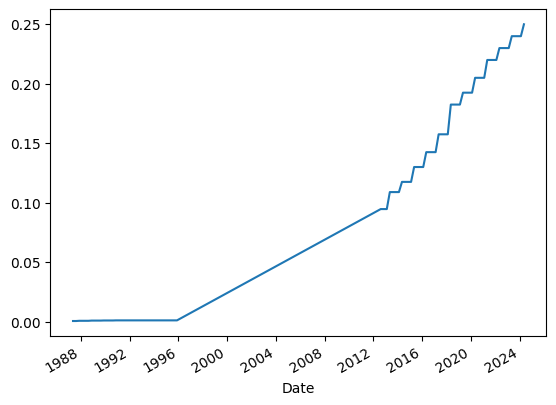

In [ ]:
# Looking at dividends
apple.dividends.plot()

Now doing stuff with AMD

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable
    #print("Type:", type(apple_info))
amd_info

amd = yf.Ticker("AMD")

--2024-07-31 14:39:45--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.1’

amd.json.1          100%[===================>]   5.70K  --.-KB/s    in 0s      

2024-07-31 14:39:45 (1.17 GB/s) - ‘amd.json.1’ saved [5838/5838]



In [ ]:
amd_info['country']

'United States'

In [ ]:
amd_info['sector']

'Technology'

In [ ]:
amd_stocks = amd.history(period="max")
amd_stocks.head(1)['Volume']

,Volume
Date,
1980-03-17 00:00:00-05:00,219600


In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

# Get website data text
netflix_html = requests.get(url).text

# Read into beautiful soup
soup = BeautifulSoup(netflix_html, 'html5lib')
soup

netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all('tr'):
  entries = row.find_all('td')
  date = entries[0].text
  open = entries[1].text
  high = entries[2].text
  low = entries[3].text
  close = entries[4].text
  volume = entries[6].text

  netflix_data = pd.concat([netflix_data,pd.DataFrame({"Date":[date], "Open":[open], "High":[high], "Low":[low], "Close":[close], "Volume":[volume]})], ignore_index=True)

netflix_data.head()


,Date,Open,High,Low,Close,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600"
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600"
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300"
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900"
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300"


In [ ]:
# For amazon
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"

# Get website data text
amzn = pd.read_html(url)[0]
amzn.head()



amazon_html = requests.get(url).text

# Read into beautiful soup
soup = BeautifulSoup(amazon_html, 'html5lib')
soup.find("title").text

In [ ]:
amzn.tail(2)

Moving onto Gamestop vs. Tesla and dashboarding

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [ ]:
# Get Tesla stock data
tesla_data = yf.Ticker("TSLA").history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

# Get Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
revenue_data = pd.read_html(url)[1]
revenue_data.head()

# Cleaning
revenue_data.rename(columns={revenue_data.columns[0]: 'Date', revenue_data.columns[1]: 'Revenue'}, inplace=True)

revenue_data["Revenue"] = revenue_data['Revenue'].str.replace(',|\$',"", regex=True)

revenue_data.dropna(inplace=True)
revenue_data = revenue_data[revenue_data['Revenue'] != ""]

revenue_data.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [ ]:
# Get Gamestop stock data
gme_data = yf.Ticker("GME").history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head(5)

# Get Gamestop revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_revenue_data = pd.read_html(url)[1]
gme_revenue_data.head()

# Cleaning
gme_revenue_data.rename(columns={gme_revenue_data.columns[0]: 'Date', gme_revenue_data.columns[1]: 'Revenue'}, inplace=True)

gme_revenue_data["Revenue"] = gme_revenue_data['Revenue'].str.replace(',|\$',"", regex=True)

gme_revenue_data.dropna(inplace=True)
gme_revenue_data = gme_revenue_data[gme_revenue_data['Revenue'] != ""]

revenue_data.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [ ]:
make_graph(tesla_data, revenue_data, 'Tesla')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
make_graph(gme_data, gme_revenue_data, 'GameStop')

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

